<a href="https://colab.research.google.com/github/junehyung1112/hello-world/blob/master/6%EA%B0%95_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#현실 세계에서 두개의 분포를 학습해 예측해야하는 이진 분류 상황이 많이 발생.
#메일을 스펨과 펨으로 구분하거나, 대출을 승인, 거부한다거나
#특정 질병을 음성, 양성으로 구분하는 등등.
#logistic 회귀 모델 : 전체 데이터를 2개의 데이터로 분류할 수 있는 가장 적절한 직선을 찾음.
#사례: 신용도에 따른 대출 승인. 과거 신용 점수가 얼마일 때 승인했는지 거부했는지에 대해
#데이터가 있을 때 이를 이용해서 판단 가능.
#선형 회귀와는 달리 분류에 대한 문제.
#당뇨병 진단 예측 : 당뇨병 관련 여러가지 수치를 측정하고 발병 가능성을 검증. ->한다 안한다로 분류
#이 때는 다양한 측정 데이터를 사용해야 함.
#spam 필터링 : spam에서 자주 사용되는 단어가 있음. 특정 단어의 출현 빈도로 구분 가능.


#직선을 이용한 이항 분포 모델링
#기준 값이 매번 달라질 수 있어서 정의 하기가 어려워짐. -> 다른 학습 방법이 필요.
#이진 분류는 확률과 매우 연관이 깊음.
#최댓값을 1로 제한하면 출력값을 확률로 표시할 수 있어 해석과 분석에 유용함.
#미분 가능한 연속함수로 변환할 경우 미분값이 부드럽게 증감되어 안정적인 학습이 가능함.
#위와 같은 조건을 만족하는 함수 : sigmoid function
#s자 모양을 갖는 함수. 중심축 0을 중심으로 좌측은 0으로 수렴, 우측은 1로 수렴.
#sigmoid 함수를 이용하면 출력값을 0~1사이로 제한해서 확률값으로 해석, 모든 지점에서 미분이 가능해 출력 변환 함수로 유용.
#신경망 부분에선 sigmoid 함수가 문제가 있어서 다른 함수를 사용.
#로지스틱 회귀는 출력값을 시그모이드 함수를 사용해 전체데이터 학습.
#cost함수로 시그모이드 함수를 사용하는 것이 다름. w가 커지면 계단 함수처럼 됨.
#w의 절대값이 작으면 일반적으로 상관 관계가 약함을 의미함.
#b는 시그모이드 함수를 좌우로 얼마만큼 이동시킬 것인가를 의미.
#sigmoid 함수를 사용하면 최소값에 수렴되지 않고 작은 골짜기에서 멈출 수도 있음.(지역적 최소점)
#따라서 시그모이드 함수에는 cost함수가 적절하지 않음.
#정답에 대한 오차는 적고 오류에 대한 오차는 크기 위하여
#예측한 값이 0이면 무한ㅐ로 값이 커지고
#예측한 값이 1이면 오차를 0으로 보내는 함수.
#위 두조건(반대도 가능)은 log함수를 사용하면 충족 가능.
#결정 경계: 2차원 데이터에 대해서 데이터를 두개의 그룹으로 잘 나눌 수 있는 직선.
#결정 경계는 이진분류에서 학습이 잘 되었는지 판단하는데 유용. 원과 같은 다양한 형태 가질 수 있음.


import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image #image를 다룰 때 사용

%matplotlib inline

sess = tf. Session()



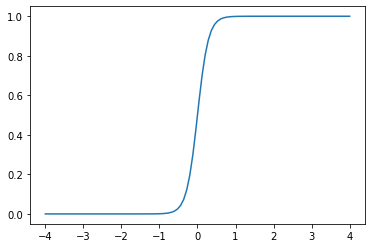

In [0]:
#w의 변화에 따른 sigmoid 함수 특성 알아보기
w = 7
b = 0.0
x = np.linspace(-4,4, 100) #-4에서 4까지 100개의 샘플

h = w*x + b
y = tf.sigmoid(h)

y_ = sess.run(y)
plt.plot(x, y_) #w가 커서 매우 급격하게 변함.

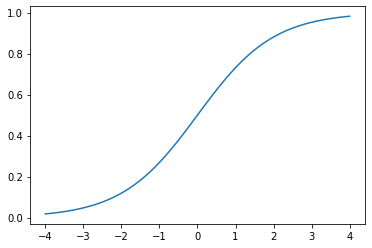

In [0]:
#w의 변화에 따른 sigmoid 함수 특성 알아보기
w = 1
b = 0.0
x = np.linspace(-4,4, 100) #-4에서 4까지 100개의 샘플

h = w*x + b
y = tf.sigmoid(h)

y_ = sess.run(y)
plt.plot(x, y_) #w가 작아져서 완만하게 변함.

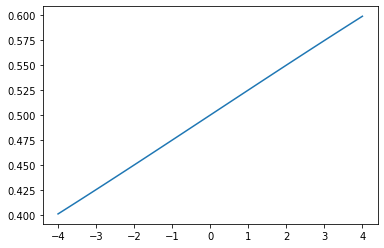

In [0]:
#w의 변화에 따른 sigmoid 함수 특성 알아보기
w = 0.1
b = 0.0
x = np.linspace(-4,4, 100) #-4에서 4까지 100개의 샘플

h = w*x + b
y = tf.sigmoid(h)

y_ = sess.run(y)
plt.plot(x, y_) #거의 직선에 가까움. y값이 0.4~0.6 

0 0.01798620996209156 0.9820137900379085
-0.5 0.01098694263059318 0.9706877692486436
0.5 0.02931223075135632 0.9890130573694068


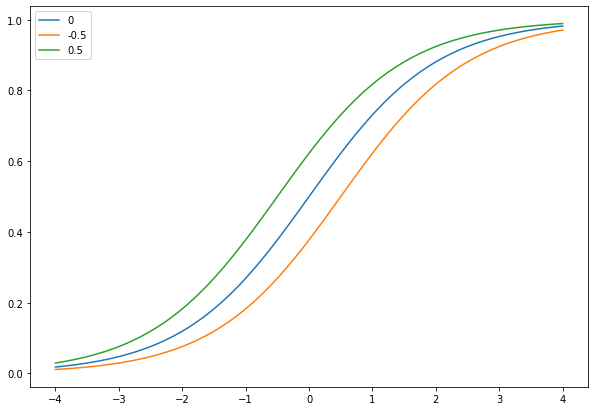

In [0]:
#b변화에 따른 sigmoid 함수 특성.

plt.figure(figsize=(10,7))

bs = [0, -0.5, 0.5]
for i in range(3):
  b = bs[i]
  w = 1
  x = np.linspace(-4, 4, 100)
  h = w * x + b
  y = tf.sigmoid(h)

  y_ = sess.run(y)
  plt.plot(x, y_)

  print(b, np.min(y_), np.max(y_))
plt.legend(bs) #축으로 그래프가 이동 b가 크면 왼쪽 작으면 오른쪽

inf
inf


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Legend does not support '-' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Legend does not sup

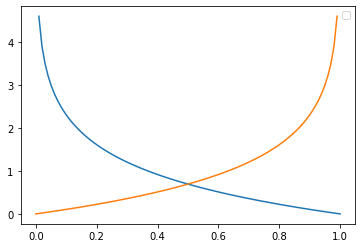

In [0]:
#log함수 특성 알아보기.

x= np.linspace(0,1,100)

y= sess.run(-tf.log(x))
plt.plot(x,y)
print(y[0])

y2= sess.run(-tf.log(1-x))
plt.plot(x,y2)
print(y2[99])

plt.legend("-log(x)", "-log(1-x)")

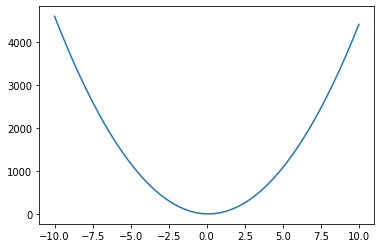

In [0]:
#sigmoid 함수에 대한 cost 함수의 특성.

#sigmoid 함수 사용 안할 시 cost 함수 알아보기.
ws = np.linspace(-10, 10, 50)
x_data = np.array([1,2.4,3.1,4.1,6.3,7.8,8.43,9.6,10.4])
y_data = np.array([0,0,0,0,1,1,1,1,1])

cost = []
for w in ws:
  h = w * x_data
  v = (h - y_data) ** 2
  cost.append(np.mean(v))
plt.plot(ws, cost) #볼록한 모양이기 때문에 글로벌한 최적점을 경사하강법을 통해 찾아낼 수 있음.

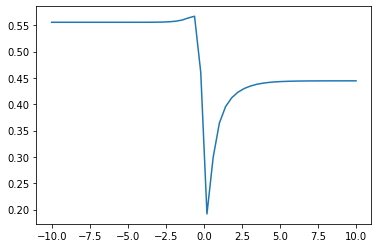

In [0]:
#h에 대해서 sigmoid 함수를 적용하고 w의 변화에 따른 cost의 변화량 확인.

ws = np.linspace(-10, 10, 50)
x_data = np.array([1,2.4,3.1,4.1,6.3,7.8,8.43,9.6,10.4])
y_data = np.array([0,0,0,0,1,1,1,1,1])

cost = []
for w in ws:
  h = w * x_data
  y_ = sess.run(tf.sigmoid(h))
  v = (y_ - y_data)**2
  cost.append(np.mean(v))
plt.plot(ws, cost) #학습이 제대로 이루지지 않게됨. 혹은 학습 수렴 속도가 매우 느릴 수 있음.

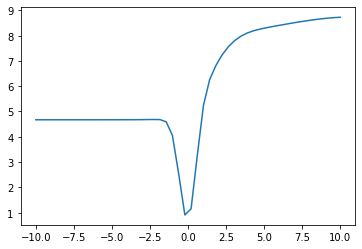

In [0]:
#log 함수를 사용한 cost함수로 변경.

ws = np.linspace(-10, 10, 50)
x_data = np.array([1,2.4,3.1,4.1,6.3,7.8,8.43,9.6,10.4])
y_data = np.array([0,0,0,0,1,1,1,1,1])

cs = []
for w in ws:
  h = w * x_data
  y = tf.sigmoid(h)
  cost = -tf.reduce_mean(y_data * tf.log(y + 10e-5) + (1 - y_data) + tf.log(1- y + 10e-5))
  c = sess.run(cost) 
  cs.append(c)
plt.plot(ws, cs) #u자 형태는 아니지만 글로벌한 최적점을 찾을 수 있음.

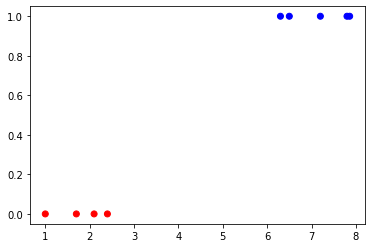

In [0]:
#가상의 데이터를 사용해서 로지스틱 회귀 수행.

x_data = np.array([1.0, 2.4, 2.1, 1.7, 6.3, 7.8, 7.2, 7.86, 6.5])
y_data = np.array([0.0, 0, 0, 0, 1, 1, 1, 1, 1])

colors = ["red" if i == 0 else "blue" for i in y_data]
plt.scatter(x_data, y_data, color=colors)

Step 0 : cost = 1.274518 w = 0.992452 b = 0.995844 predict = [1. 1. 1. 1. 1. 1. 1. 1. 1.]
Step 5000 : cost = 0.081454 w = 1.047536 b = -3.895772 predict = [0. 0. 0. 0. 1. 1. 1. 1. 1.]
Step 10000 : cost = 0.040981 w = 1.347385 b = -5.258113 predict = [0. 0. 0. 0. 1. 1. 1. 1. 1.]
Step 15000 : cost = 0.027413 w = 1.525708 b = -6.056407 predict = [0. 0. 0. 0. 1. 1. 1. 1. 1.]
Step 20000 : cost = 0.020633 w = 1.652992 b = -6.622487 predict = [0. 0. 0. 0. 1. 1. 1. 1. 1.]


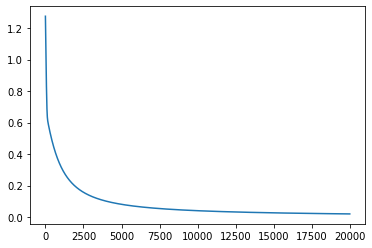

In [0]:
#w와 b를 추정해야함.

w = tf.Variable(1.0)
b = tf.Variable(1.0)

hypothesis = tf.sigmoid(w * x_data + b)

cost = -tf.reduce_mean(y_data * tf.log(hypothesis) + (1-y_data) * tf.log(1-hypothesis)) #log함수와 경사하강법 사용

update = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)
predict = tf.cast(hypothesis > 0.5, 1) #cast함수를 사용해서 출력값이 0.5초과이면 1 아니면 0

sess.run(tf.initialize_all_variables()) #각종 텐서플로우 변수를 초기화.

cs = []
iteration = 20001
for step in range(iteration):
  c, w_, b_, p, _ = sess.run([cost, w, b, predict, update])
  if step % 5000 == 0:
      print("Step %d : cost = %f w = %f b = %f predict = %s" % (step, c, w_, b_, p))
  cs.append(c) #cost
plt.plot(cs)#cost에 대한 결과 그림으로 표현.
#cost값은 계속해서 줄어들고 있기 때문에 학습이 계속 이루어지고 있음을 알 수 있음.

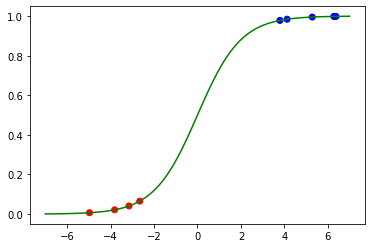

In [0]:
#어떻게 학습 되었는지 그래프로 나타냄.
h = w_ * x_data + b_
y_ = 1 / (1+np.exp(-h))
plt.scatter(h, y_, color = colors)

x = np.linspace(-7,7,100)
y = 1 / (1+np.exp(-x))
plt.plot(x, y, color = "green") #학습된 시그모이드 함수는 초록색 직선. 0.5를 기준으로 2개의 데이터가 잘 분류됨

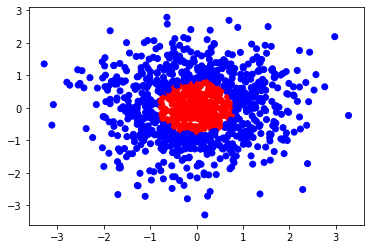

In [0]:
#비선형 분포
samples = 1000
x_data = np.random.normal(0,1,size=[samples, 2]) #평균은 0 표준편차1인 도넛모양 데이터 생성
d = np.sqrt([x[0]**2+x[1]**2 for x in x_data]) #중심에서 거리가 가까운 것과 멀리 떨어진 것을 분할하기 위해서 0,0 에서 떨어진 거리를 계산
y_data = np.array([0 if i < 0.8 else 1 for i in d ]).reshape(samples, 1) #거리에 따라 학습데이터를 두 그룹으로 분류
colors = ["red" if i == 0 else "blue" for i in y_data] #값이 0이면 빨강 1이면 파랑
plt.scatter(x_data[:,0], x_data[:,1], color=colors) #scatter함수를 이용해 출력.

In [0]:
x = tf.placeholder(tf.float32, shape=[None,2])
y = tf.placeholder(tf.float32)
w = tf.Variable(tf.random_normal([2,1]))
b = tf.Variable(tf.random_normal([1]))
hypothesis = tf.sigmoid(tf.matmul(x,w)+b)

cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1-y) * tf.log(1-hypothesis))
update = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype = tf.float32))

sess.run(tf.initialize_all_variables())

for step in range(3001):
  _, c, a = sess.run([update, cost, accuracy], feed_dict={x:x_data, y:y_data})
  if step  % 500 == 0:
    print(step, c, a) #500번마다 코스트와 정확도를 출력. 

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0 1.0890396 0.511
500 0.63608164 0.578
1000 0.578837 0.741
1500 0.5728346 0.741
2000 0.57208645 0.741
2500 0.571985 0.741
3000 0.5719708 0.741


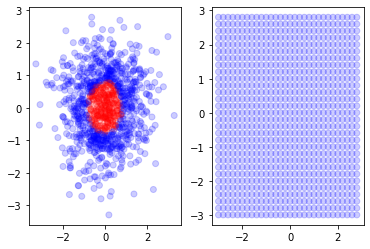

In [0]:
#학습데이터와 결정경계면을 두개로 나누어 출력.
plt.subplot(1,2,1)
colors = ["red" if i == 0 else "blue" for i in y_data]
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=0.2)

xx, yy = np.mgrid[-3.0:3:0.2, -3.0:3.0:0.2]
grid = np.c_[xx.ravel(), yy.ravel()]

plt.subplot(1,2,2)
p = sess.run(hypothesis, feed_dict = {x:grid})
colors = ["red" if i<0.5 else "blue" for i in p]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)
#왼쪽은 학습데이터 오른쪽은 결정경계
#비선형 분포를 분류할 수 없어서 결정경계가 파란색으로 나타남을 알 수 있음(파란색이 훨씬 많아서 파란색 하는게 오류 적음)
#로지스틱 회귀는 선형 분류만 할 수 있음을 알 수 있음.

In [0]:
from google.colab import drive #구글 드라이브에서 정보를 가져오기 위해서 코랩과 구글 드라이브를 연동.
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#당뇨병 발생 여부 진달을 위한 로지스틱 회귀
data = np.loadtxt("/content/drive/My Drive/files/diabetes.csv", delimiter=",", dtype=np.float32)
print(data.shape)

label = ["임신횟수", "글루코스 내성 실험 후의 혈당 수치", "확장기 혈합", "상완 삼두근 피부 두께",
         "혈액내 인슐린 수치", "BMI", "당뇨병 가족력", "나이"]
#만약 0이면 당뇨병 X 1이면 발병.

(768, 9)


In [0]:
#전체 데이터에서 8개를 X 나머지를 Y속성으로 정의
dim = 8
x_data = data[:, 0:dim]
y_data = data[:, dim]
print(y_data.shape)
y_data = y_data.reshape(768,1) #reshape 하고 대입
print(x_data.shape)
print(y_data.shape)


mx = np.max(x_data, axis=0) #max를 사용해서 모든 값을 맥스 값으로 나누어 0~1사이의 값으로 정규화 함.
x_data = x_data / mx

(768,)
(768, 8)
(768, 1)


In [0]:
#학습 데이터를 저장할 placeholder 타입의 변수 x, y를 정의
x = tf.placeholder(tf.float32, shape=[None, dim]) #8개의 속성으로 구성. 학습데이터는 가변이라서 None으로 넣음.
y = tf.placeholder(tf.float32)

w = tf.Variable(tf.random_normal([dim, 1])) #8*2행렬
b = tf.Variable(tf.random_normal([1])) #크기가 1인 행렬.
hypothesis = tf.sigmoid(tf.matmul(x,w)+b) #가설

In [0]:
#cost함수는 이진 분류이기 때문에 로그함수를 사용해 젖ㅇ의

cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32) #true false를 0과 1로 바꾸기 위해 cast 함수 사용.
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))#정확도는 예측값과 학습 레이블 y가 같은 지 비교해서 나온 값 true false를 0 1로 변환해서 평균

update = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)  #경사하강법을 사용

In [0]:

sess.run(tf.initialize_all_variables())
for step in range(40001) :
    _, c, a = sess.run([update, cost, accuracy], feed_dict={x:x_data, y:y_data} )
    if  step % 5000 == 0 :
      print(step, c, a) #출력결과를 보면 cost가 낮아지고 정확도가 점차 높아짐. 

0 0.68827623 0.57682294
5000 0.61369336 0.67057294
10000 0.57388204 0.72265625
15000 0.5486875 0.74088544
20000 0.5317235 0.75
25000 0.5196902 0.7630208
30000 0.5107936 0.76171875
35000 0.50399965 0.76692706
40000 0.49867812 0.77213544


In [0]:
#학습된 모델을 사용해 당뇨병과 관련 높은 속성 분석
w_ =  sess.run(w) #학습된 w는 각 속성에 대한 기울기를 의미.
for i in range(dim) : #학습된 w를 메모리로 가져오고 여덟개 속성에 대해 각각의 이름과 w값 출력. w=8*2행렬
  print(label[i] , w_[i])

  #오류발생 

TypeError: ignored

In [0]:
data = np.loadtxt("/content/drive/My Drive/files/spambase.csv", delimiter=",", dtype=np.float32)
print(data.shape)

lab = ["make", "address", "all", "3d", "our", "over",  "remove",  "internet", "order", "mail",   "receive",
       "will", "people",  "report", "addresses", "free",  "business",   "email",  "you",  "credit", "your",  "font",  "000", 
       "money",   "hp",  "hpl", "george", "650",  "lab",  "labs",  "telnet",   "857",  "data",  "415",   "85",           
       "technology",   "1999",   "parts",   "pm",   "direct",  "cs",   "meeting", "original", "project",  "re",  "edu",          
       "table", "conference", "char_freq_;", "char_freq_(",  "char_freq_[",   "char_freq_!",   "char_freq_$",   "char_freq_#",            
       "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total"]  

#단어의 빈도수를 나타냄.마짐작 58번째속성이 스팸메일인지 아닌지를 나타냄. 

(4601, 58)


In [0]:
#2
dim = 57 #57까지의 데이터를 x속성 마지막속성을 y속성.
x_data = data[:, 0:57]
y_data = data[:,57]
y_data = y_data.reshape(4601,1)  

mx = np.max(x_data, axis=0)
x_data = x_data / mx #전체 데이터를 0에서 1사이로 정규화.

In [0]:
#3
x= tf.placeholder(tf.float32, shape=[None,  dim]) #학습데이터를 저장할 x, y 변수
y = tf.placeholder(tf.float32)
w = tf.Variable(tf.random_normal([dim ,1])) 
b = tf.Variable(tf.random_normal([1]))
hypothesis = tf.sigmoid(tf.matmul(x, w) + b)

In [0]:
#4
cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis)) 
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

In [0]:
#5
init = tf.initialize_all_variables()
sess.run(init)
for step in range(25001) :
    _, c, a = sess.run([train, cost, accuracy], feed_dict={x:x_data, y:y_data} )
    if  step % 5000 == 0 :
        print(step, c, a)

0 0.88475674 0.40317324
5000 0.611309 0.6820257
10000 0.56657773 0.7346229
15000 0.53374416 0.7691806
20000 0.5086694 0.7917844
25000 0.48884892 0.8046077


<BarContainer object of 57 artists>

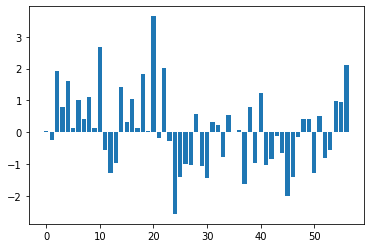

In [0]:
#6
w_ = sess.run(w) #run함수를 이용해 학습된 w를 메모리로 가져옴.
plt.bar(np.arange(0,dim), w_.flatten()) #속성수가 많기 때문에 bar그래프를 사용해서 w값을 출력.
#w값이 크면 spam메일과 강한 상관관계를 가짐.

In [0]:
#7
idx = np.where( np.abs(w_) > 2.0  )  #w의 절댓값이 2보다 큰 경우의 인덱스를 튜플 타입으로 리턴.
print(idx[0]) #인덱스 정보는 0번째에 존재.
word = [ lab[v] for v in idx[0]] 
print(word)

[10 20 22 24 45 56]
['receive', 'your', '000', 'hp', 'edu', 'capital_run_length_total']
